In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r'C:\Users\ingnilss\Downloads\archive\household_power_consumption.txt',
                sep=';',
                parse_dates={'dt':['Date', 'Time']},
                infer_datetime_format=True,
                low_memory = False,
                na_values=['nan', '?'],
                index_col='dt'
                )

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
# Subset to Post 2010
df = df['2010-01-01 00:00:00':]

#Resample to hourly using average
df = df.resample('H').mean()

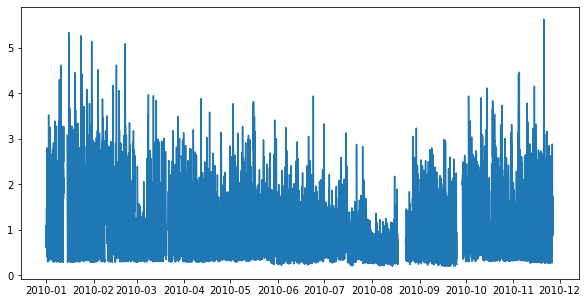

In [12]:
plt.figure(figsize = (10,5))
plt.plot(df['Global_active_power'])
plt.show()

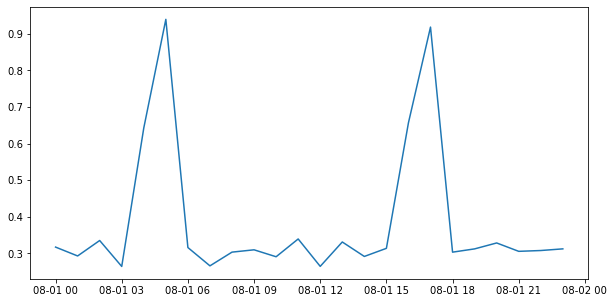

In [13]:
plt.figure(figsize = (10,5))
plt.plot(df['Global_active_power']['2010-08-01':'2010-08-01']) #Looking at 1st of august
plt.show()

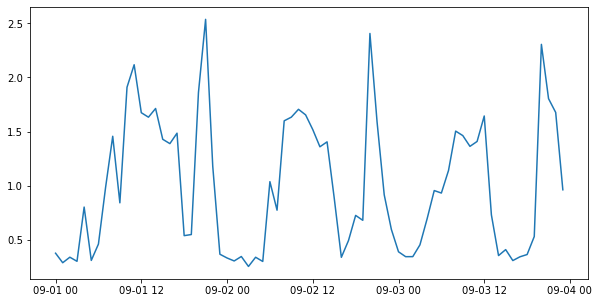

In [15]:
plt.figure(figsize = (10,5))
plt.plot(df['Global_active_power']['2010-09-01':'2010-09-03']) #Looking at first days of september
plt.show()

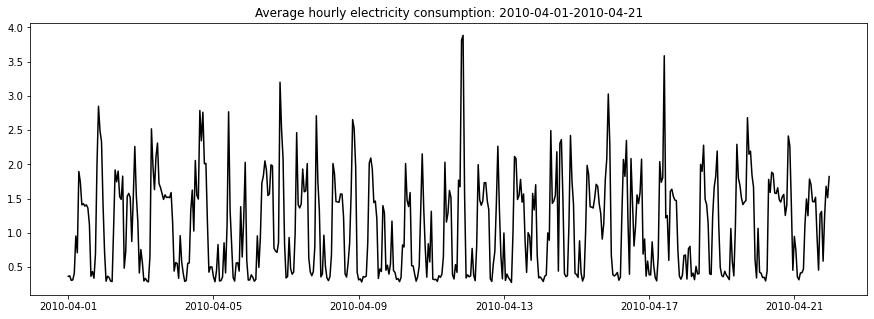

In [18]:
start = '2010-04-01'
end = '2010-04-21'
plt.figure(figsize = (15,5))
plt.plot(df['Global_active_power'][start:end], color = 'k') #Looking at april
plt.title('Average hourly electricity consumption: {}-{}'.format(start, end))
plt.show()

In [20]:
df['HE'] = df.index.hour+1
df['Month'] = df.index.month
df['DoW'] = df.index.dayofweek
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'HE', 'Month', 'DoW'],
      dtype='object')

In [22]:
import seaborn as sns

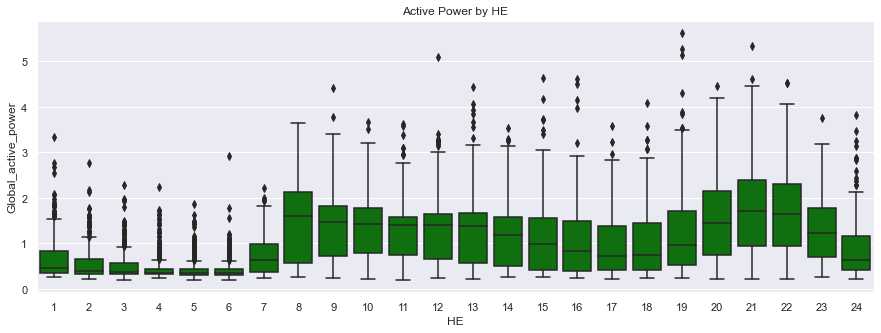

In [25]:
# Hourly Seasonality

sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = 'HE', y = 'Global_active_power', data = df, color = 'green').set(title='Active Power by HE')
plt.show()


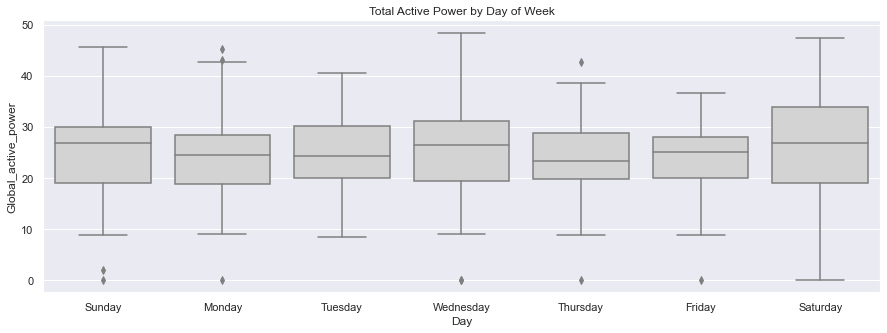

In [34]:
# DoW impact

dfD = df.resample('D').sum()
dfD['Day'] = df['DoW'].map({
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'})
sns.boxplot(x = 'Day', y = 'Global_active_power', data = dfD, color = 'lightgrey',
           order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).set(title='Total Active Power by Day of Week')
plt.show()


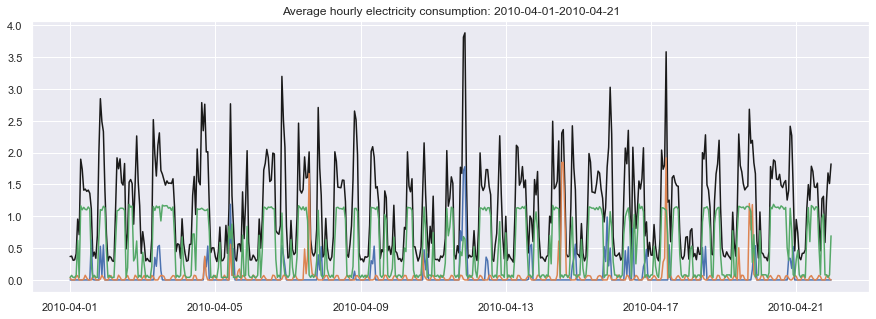

In [36]:
#Look at submeterings

start = '2010-04-01'
end = '2010-04-21'
plt.figure(figsize = (15,5))
plt.plot(df['Global_active_power'][start:end], color = 'k')
for sub in range(3):
    plt.plot(df['Sub_metering_{}'.format(sub+1)][start:end]/1000*60) #submeterings are in watts, total is in kW
plt.title('Average hourly electricity consumption: {}-{}'.format(start, end))
plt.show()

<Figure size 1080x360 with 0 Axes>

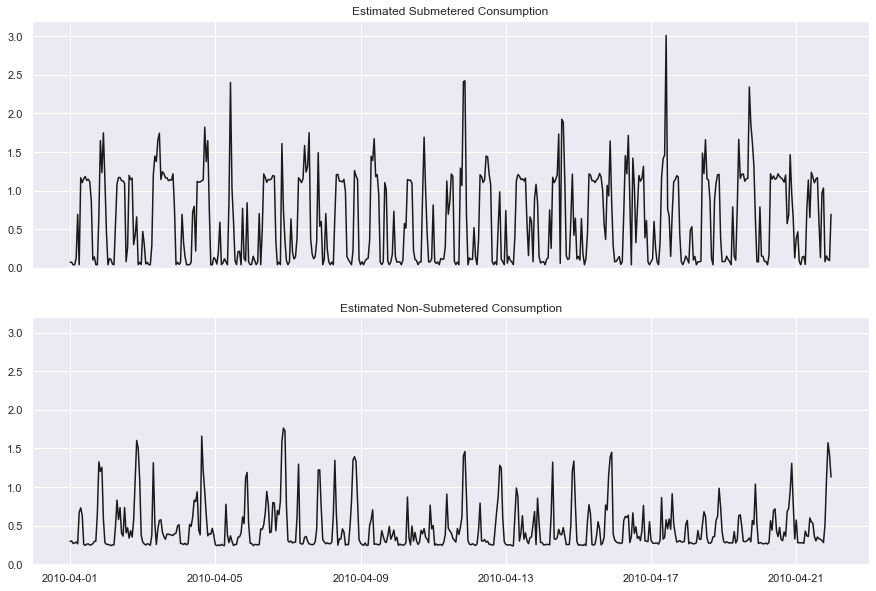

In [39]:
plt.figure(figsize=(15,5))
start = '2010-04-01'
end='2010-04-21'

df['nonSubMetered'] = df['Global_active_power'] - (df['Sub_metering_1']/1000*60) - (df['Sub_metering_2']/1000*60) - (df['Sub_metering_3']/1000*60)
df['subMetered']= (df['Sub_metering_1']/1000*60) + (df['Sub_metering_2']/1000*60) + (df['Sub_metering_3']/1000*60)

fig, axes = plt.subplots(2,1,figsize = (15,10), sharex = True)

axes[0].plot(df['subMetered'][start:end], color = 'k')
axes[0].title.set_text('Estimated Submetered Consumption')
axes[0].set_ylim(0,3.2)

axes[1].plot(df['nonSubMetered'][start:end], color = 'k')
axes[1].title.set_text('Estimated Non-Submetered Consumption')
axes[1].set_ylim(0,3.2)

plt.show()

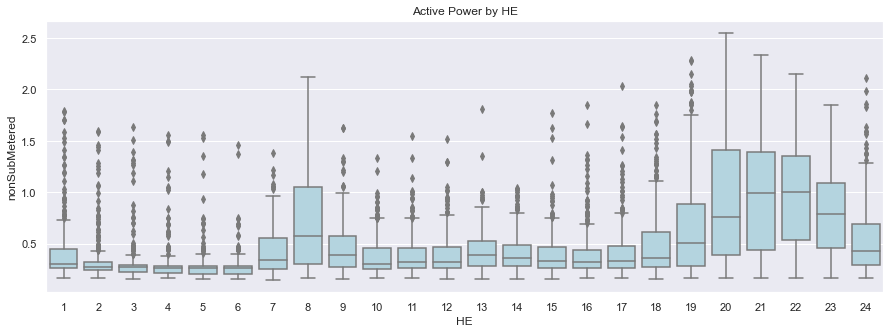

In [41]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = 'HE', y = 'nonSubMetered', data = df, color = 'lightblue').set(title='Active Power by HE')
plt.show()

In [45]:
#Decompose Time Series
from statsmodels.tsa.seasonal import STL
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'HE', 'Month', 'DoW', 'nonSubMetered', 'subMetered'],
      dtype='object')

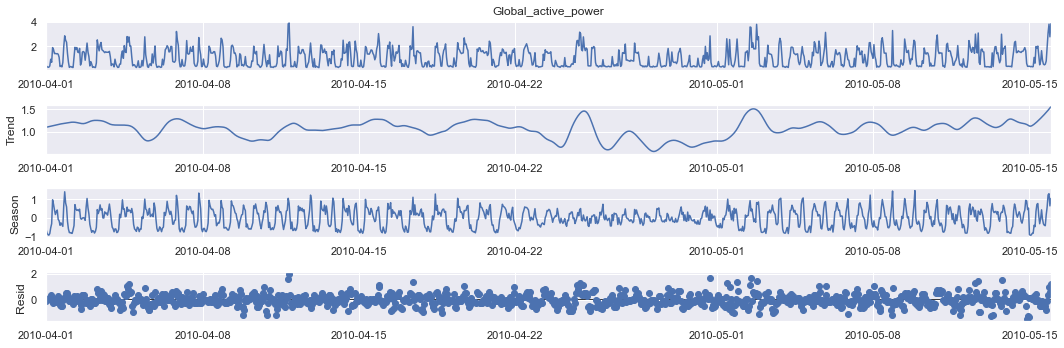

In [46]:


res = STL(df['Global_active_power']['2010-04-01':'2010-05-15']).fit()
res.plot()
plt.show()